<a href="https://colab.research.google.com/github/SakshamTripathi1996/Data-Science/blob/main/Team_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

  Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

 This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.Explore and analyze the data to discover important factors that govern the bookings. 

# 1.Getting the Data


In [1]:
#importing all important python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime 
from time import strftime

In [2]:
#mounting drive
from google.colab import drive            
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#defining the path of the file
path="/content/drive/MyDrive/Copy of Hotel Bookings.csv"  

In [4]:
#reading csv file
data=pd.read_csv(path)

# Data Exploration

First thig first, let's explore our dataset and see what is inside

In [5]:
#to check number of rows and column we have
data.shape   

(119390, 32)

In [6]:
#checking first 5 rows
data.head()  

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


So, as we can see we have 32 columns and 119390 rows in our dataset. Now let's deep dive more into the column information.

In [9]:
#to know heading of columns in dataset
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
#let's check information of dataset to know datatype of all columns to understand in better way
data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Each row of the dataframe represents a unique customer, and variables are very much self explanatory. Just adr denotes average daily rate paid by the customer and lead_time is the time between booking and visiting the hotel.

In [11]:
#to get quick observation of dataset we have
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


*Quick observation*
37.04 % of the people have cancelled their booking as per the dataset.
Avg. lead time is 104 days.
Only 3% of the guests are repeated.Average adr is 102.

#**Cleaning and pre-processing of the dataset**

While cleaning data we will perform following steps:
1)Remove Duplicates
2)Handling missing values
3)Convert columns to appropriate datatypes.


**Dropping Duplicates**

In [12]:
# Show no. of rows of duplicate rows duplicate rows
data[data.duplicated()].shape  

(31994, 32)

In [13]:
# Droping duplicate values
data.drop_duplicates(inplace=True)

In [14]:
data.shape  

(87396, 32)

**Missing values**

In [15]:
# getting summary of missing values present in the dataset.
for column in data:
  if data[column].isnull().any():
    print('{0} column has {1} missing values, which are {2} % of total column'.format(column,data[column].isnull().sum(),round(data[column].isnull().sum()*100/data.shape[0],3)))

children column has 4 missing values, which are 0.005 % of total column
country column has 452 missing values, which are 0.517 % of total column
agent column has 12193 missing values, which are 13.951 % of total column
company column has 82137 missing values, which are 93.983 % of total column


In [16]:
# as company column has 94% missing values so we are dropping that column
data=data.drop(['company'],axis=1)

In [17]:
#filling null values
data['agent'].fillna(0, inplace = True)                               # filling null values of agent with 0
data['children'].fillna(data['children'].mean(), inplace = True)      #filling null values of children with mean
data['country'].fillna('unknown', inplace = True)                     # filling null values of country with 'unknown'

**Converting columns to appropriate datatypes.**

In [18]:
#now let's convert datatype of columns 'children' and 'agent' from float to int.
data[['children','agent']]=data[['children','agent']].astype(int)

In [19]:
# changing datatype of column 'reservation_status_date' to data_type.
data['reservation_status_date'] = pd.to_datetime(data['reservation_status_date'], format = '%Y-%m-%d')

**Adding important columns.**

In [20]:
#let's group some of the columns which can be useful in analysis as grouped element
data['total_stay']=data['stays_in_weekend_nights']+data['stays_in_week_nights']
data['total_guests']=data['children']+data['babies']+data['adults']

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [22]:
#finding rows where total number of adults, children or babies equal to zero.
data[data['children']+data['babies']+data['adults']==0].shape

(166, 33)

In [23]:
#dropping those data where total number of adults, children or babies equal to zero.
data.drop(data[data['children']+data['babies']+data['adults']==0].index,inplace=True)

In [30]:
#dropping data where adr is negetive
data.drop(data[data['adr']<0].index,inplace=True)

#dropping data where adr is very high 
data.drop(data[data['adr']>5000].index, inplace=True)

## **Exploratory Data Analysis**

Now, our dataset is clean and ready-to-use for analysis and visualization.

Lets first find the correlation between the numerical data.

Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest',  'agent' are categorical data having numerical type. So we wont need to check them for correlation.

Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.

In [24]:
num_data = data[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_guests']]

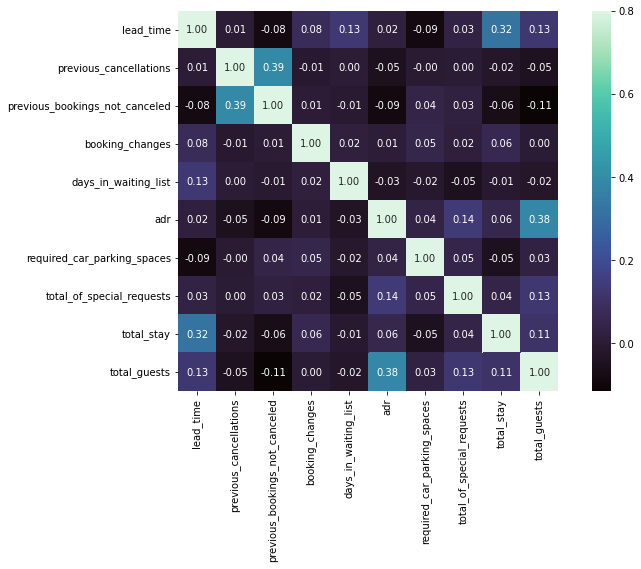

In [25]:
#correlation matrix
corrmat = num_data.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True,cmap ='mako');

This is not a highly correlated data. So by seeing heatmap we are not able to find any highly correlated columns.Still we are able to find out two results from above heatmap:

1.Lead time and total stay have slight correlation. This means when people want to stay little longer they plan little before than actual arrival.

2.Total guests and adr has some correlation. This means the number of guests increases adr will also increases.

##1. Which room type is in most demand ?

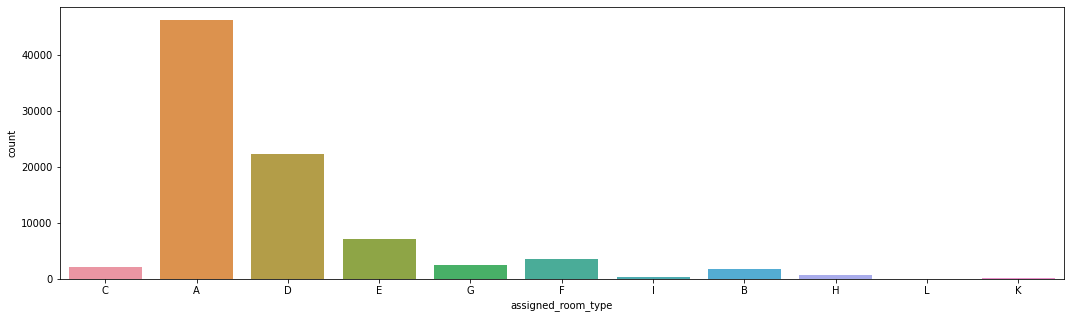

In [38]:
fig, axes=plt.subplots(figsize=(18,5))


grp_by_room=data.groupby('assigned_room_type')
data['num_of_bookings']=grp_by_room.size()

sns.countplot(x=data['assigned_room_type'])
#sns.boxplot(ax=axes[1],x=data['assigned_room_type'],y=data['adr'])
plt.show()


Most demanded room type is A. Hotel should increase room type A to increase the revenue.

#2.Which room type generate highest adr

Text(0.5, 1.0, 'ADR according to room type')

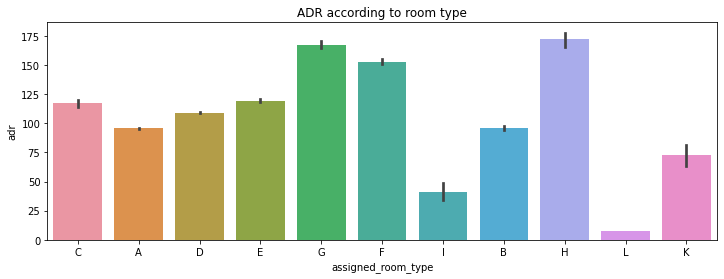

In [28]:
plt.figure(figsize=(12,4))

grp_by_room = data.groupby('assigned_room_type')
data['Num_of_bookings'] = grp_by_room.size()
ax = sns.barplot(x = data['assigned_room_type'], y = data['adr'])
ax.set_title("ADR according to room type")

Although room type A was on demand and most booked room. Highest revenue was produced by room type H followed by G.

### 3.Which meal type is most preferred meal of customers?

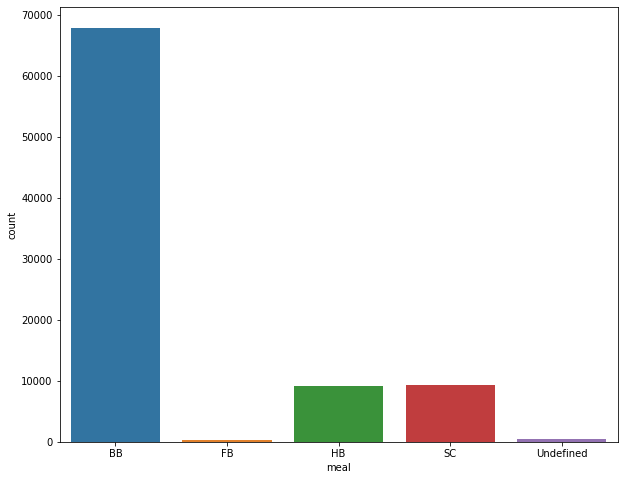

In [ ]:
plt.figure( figsize=(10, 8))

sns.countplot(x = data['meal'])
plt.show()

Most preferred meal type is BB i.e Bed and breakfast.

### 4.From which country most guests come?

In [39]:
#finding maxiumum booking among all countries
max_all=data.groupby('country')['country'].count().max()

#finding sum
sum_all=data.groupby('country')['country'].count().sum()

#finding percentage of country from most guests come.
percentage_of_prt=max_all*100/sum_all
print("Percentage of country :",round(percentage_of_prt,2),"%" )

Percentage of country : 31.36 %


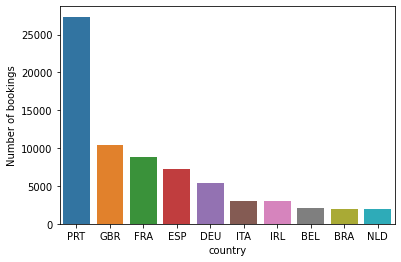

In [40]:
#groupby country
group_by_country=data.groupby('country')

#getting top 10 values
d2=pd.DataFrame(group_by_country.size()).rename(columns={0:'Number of bookings'}).sort_values('Number of bookings',ascending=False)
d2=d2[:10]

#plotting barplot
sns.barplot(x=d2.index,y=d2['Number of bookings'])
plt.show()

Portugal is the country from where most guests come.Around 31.36 % of guests come from Portugal, followed by Great Britain and France.

#5.Which is the busiest month for hotels?

In [42]:
#finding busiest month
busiest_month = data['arrival_date_month'].value_counts().reset_index()
busiest_month.columns=['month','values']
busiest_month

,month,values
0,August,11242
1,July,10043
2,May,8344
3,April,7900
4,June,7756
5,March,7489
6,October,6921
7,September,6682
8,February,6083
9,December,5112


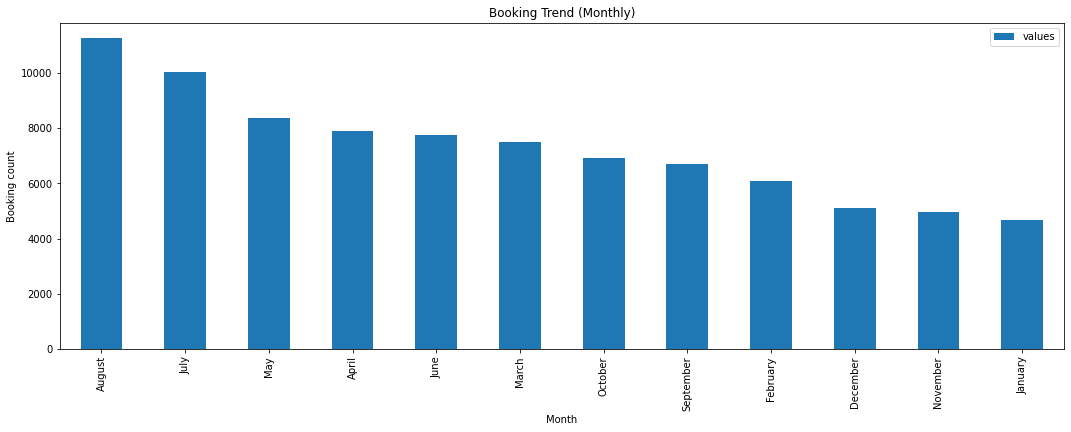

In [43]:
#plotting graph
busiest_month.plot('month', 'values', xlabel = 'Month', ylabel = 'Booking count', title='Booking Trend (Monthly)', kind='bar',figsize=(18,6))

As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

## 3.Percentage of bookings in each hotel type

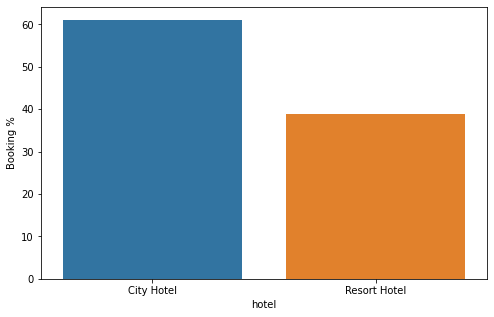

In [ ]:
grp_by_hotel=data.groupby('hotel')
d1=pd.DataFrame((grp_by_hotel.size()/data.shape[0])*100).reset_index().rename(columns={0:'Booking %'})
plt.figure(figsize=(8,5))
sns.barplot(x=d1['hotel'],y=d1['Booking %'])
plt.show()

Around 60% bookings are for City Hotel and 40% are for Resort Hotel.

## 5.How many booking were cancelled?

In [ ]:
Cancellations = data.groupby(['is_canceled','hotel'])['hotel'].count()
Cancellations

is_canceled  hotel       
0            City Hotel      37239
             Resort Hotel    25982
1            City Hotel      16035
             Resort Hotel     7974
Name: hotel, dtype: int64

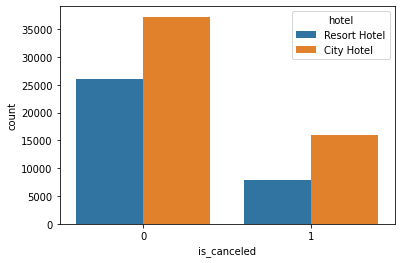

In [ ]:
sns.countplot(x = 'is_canceled', hue='hotel', data=data)

Around 8000 Resort Hotel and 16000 City Hotel got cancelled.

Most demanded room type is A,hotels should increase the number of room type A to maximize revenue.Room type H and G have highest adr.

## 8.Distribution channel and the Days on waiting list

<function matplotlib.pyplot.show>

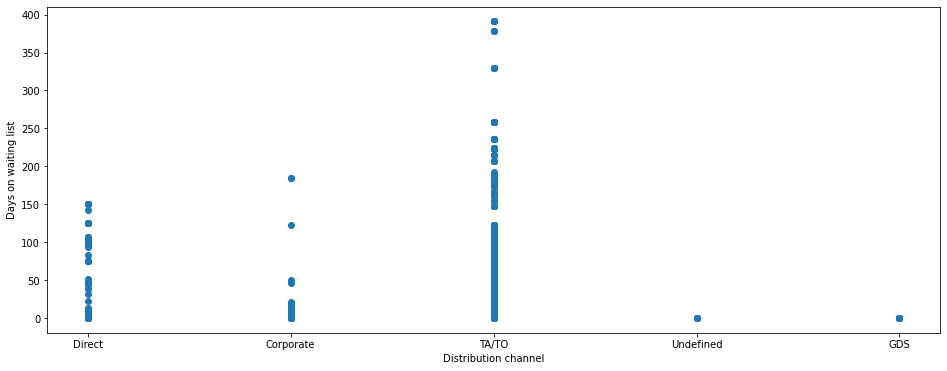

In [ ]:
fig,ax = plt.subplots(figsize=(16,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['distribution_channel'], data['days_in_waiting_list'])
ax.set_xlabel('Distribution channel')
ax.set_ylabel('Days on waiting list')
plt.show

We see that the 'Travel Agent' and 'Tour Operators' are the distribution channel for which the highest number of days are there on the waiting list.

## Booking cancellation Analysis

Let us try to understant what makes people to cancel booking.

### 9.Which  distribution channel has highest cancellation percentage?

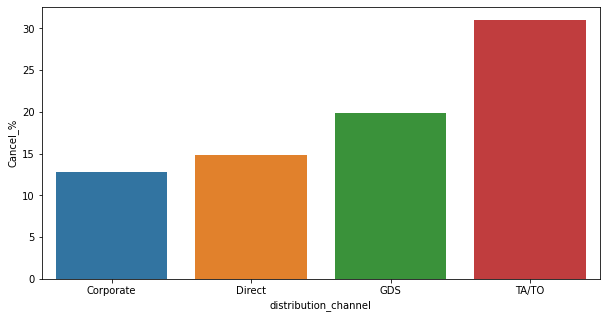

In [ ]:
group_by_dc = data.groupby('distribution_channel')
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

##10. Booking cancellation and Repeated guest

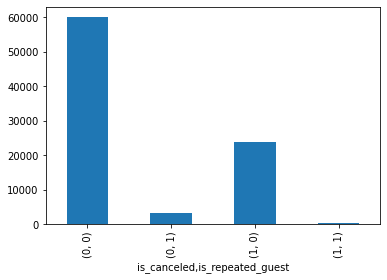

In [ ]:
data1=data.groupby(['is_canceled','is_repeated_guest']).size()
data1.plot(kind='bar')

We see that when the hotel booking is cancelled and the customer is a repeated guest, the entries are almost '0', which means that repeated guest is very less likely to cancel his booking with hotel.

## 11.Now we will check whether not getting allotted the same room type as demanded is the cause of cancellation of bookings


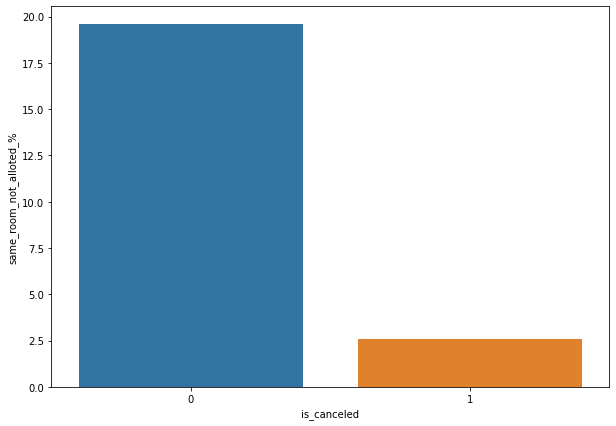

In [ ]:
def check_room_allot(x):
  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

data['same_room_not_alloted'] = data.apply(lambda x : check_room_allot(x), axis = 1)
grp_by_canc = data.groupby('is_canceled')

D3 = pd.DataFrame((grp_by_canc['same_room_not_alloted'].sum()/grp_by_canc.size())*100).rename(columns = {0: 'same_room_not_alloted_%'})
plt.figure(figsize = (10,7))
sns.barplot(x = D3.index, y = D3['same_room_not_alloted_%'])
plt.show()

Here we see that not getting same room as demanded is not the case of cancellation of rooms. A significant percentage of bookings are not cancelled even after getting different room as demanded.

## 12.Lets see does not getting same room affects the adr.

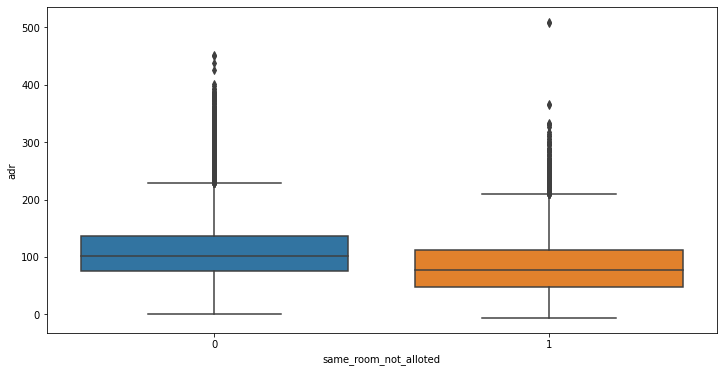

In [ ]:
data.drop(data[data['adr'] > 5000].index, inplace = True) #Dropping Outliers
plt.figure(figsize = (12,6))
sns.boxplot(x = 'same_room_not_alloted', y = 'adr', data = data)
plt.show()

Not getting same room do affects the adr, if people didn't get same room have paid a little lower.

In [ ]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [ ]:
data['adr_pp'] = data['adr'] / (data['adults'] + data['children']+data['babies']) 

In [ ]:
# calculating average ADR monthwise.
adr_month=round(data.groupby('arrival_date_month')['adr'].mean().reindex(month_index),2)

# Calculating No.of booking Monthwise.
# Confirmed Bookings
confirmed = data[data['is_canceled']==0]
# arranging hotel bookings according to month index
booking_by_month = confirmed['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month.cloumns = ['Month','Bookings']

# Calculating Average wait_time monthly.
avg_wait = data.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)


# Calculating Average lead_time monthly.
avg_lead = data.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)


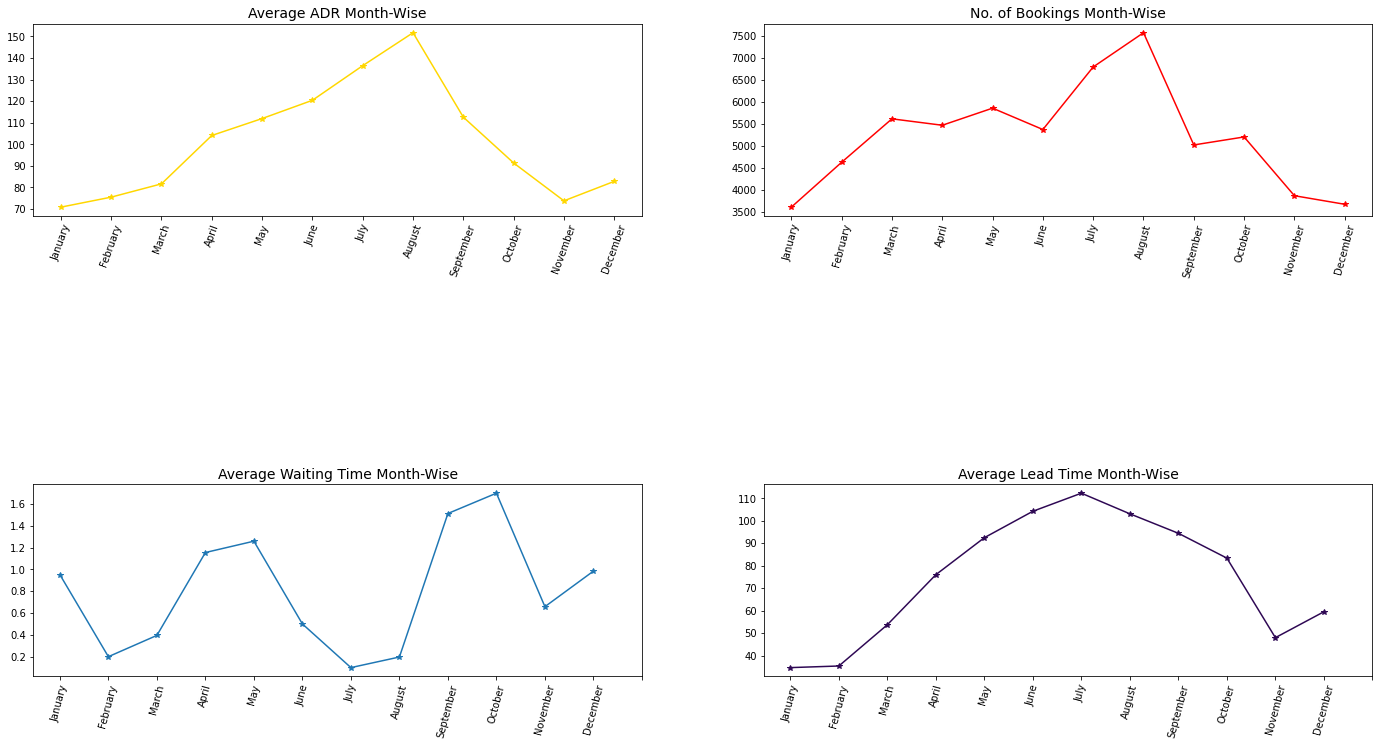

In [ ]:
fig = plt.figure(figsize=(24,12))
#  subplot #1
plt.subplot(321)
plt.title('Average ADR Month-Wise', fontsize=14)
plt.plot(adr_month.index,adr_month.values,'-*',color='#FFD700')
plt.xticks(ticks=np.arange(12),labels=adr_month.index, rotation=70)

#  subplot #2
plt.subplot(322)
plt.title('No. of Bookings Month-Wise', fontsize=14)
plt.plot(booking_by_month.index,booking_by_month.values,'-*',color='red')
plt.xticks(ticks=np.arange(12),labels= booking_by_month.index, rotation=75)

#  subplot #3
plt.subplot(325)
plt.title('Average Waiting Time Month-Wise', fontsize=14)
plt.plot(avg_wait.index,avg_wait.values,'-*')
plt.xticks(ticks=np.arange(13),labels=avg_wait.index, rotation=75)

#  subplot #4
plt.subplot(326)
plt.title('Average Lead Time Month-Wise', fontsize=14)
plt.plot(avg_lead.index,avg_lead.values,'-*',color='#2E0854')
plt.xticks(ticks=np.arange(13),labels=avg_lead.index, rotation=75)

plt.show()

So we can see that Price and no. of bookings are less in months from October to February, also in this period average lead time is also low as compared to other months. Only thing concerning is waiting time which is somewhat on higher side from Month October to February. But when waiting time is least ,price is highest for that period i.e for the month of July & August.

So best time would be from October to feb to book hotel to get cheaper price as well as to get some privacy.

In [ ]:
# What is the Optimal stay length in both types of hotels ?

In [ ]:
data.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0


In [ ]:
(data[data['total_stay']==1]).count()

hotel                             21020
is_canceled                       21020
lead_time                         21020
arrival_date_year                 21020
arrival_date_month                21020
arrival_date_week_number          21020
arrival_date_day_of_month         21020
stays_in_weekend_nights           21020
stays_in_week_nights              21020
adults                            21020
children                          21019
babies                            21020
meal                              21020
country                           20797
market_segment                    21020
distribution_channel              21020
is_repeated_guest                 21020
previous_cancellations            21020
previous_bookings_not_canceled    21020
reserved_room_type                21020
assigned_room_type                21020
booking_changes                   21020
deposit_type                      21020
agent                             14435
company                            2984


In [ ]:
stay=data.groupby(['total_stay','hotel']).agg("count").reset_index()

In [ ]:
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_stay,hotel,Number of stays
0,0,City Hotel,331
1,0,Resort Hotel,384
2,1,City Hotel,13272
3,1,Resort Hotel,7748
4,2,City Hotel,21426
...,...,...,...
71,49,City Hotel,1
72,56,Resort Hotel,2
73,57,City Hotel,1
74,60,Resort Hotel,1


Text(0.5, 0, 'total_stay(days)')

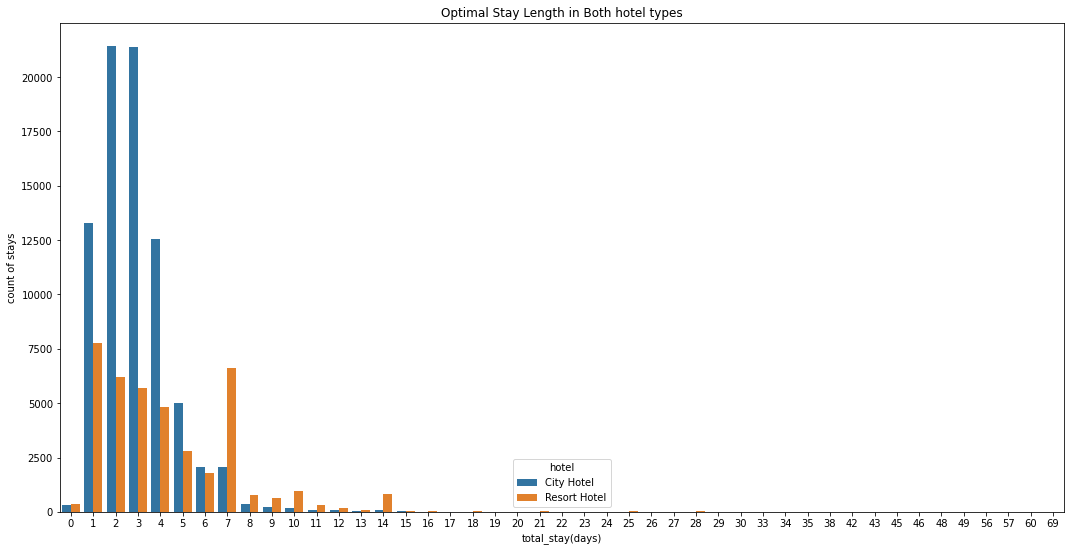

In [ ]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'total_stay', y = 'Number of stays',data= stay,hue='hotel')

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

Most people prefer to stay at the hotels of <=5 days in both types of hotel.
However in resort type people people tend to stay longer.

##7. Relation between Market segment and Days on waiting list

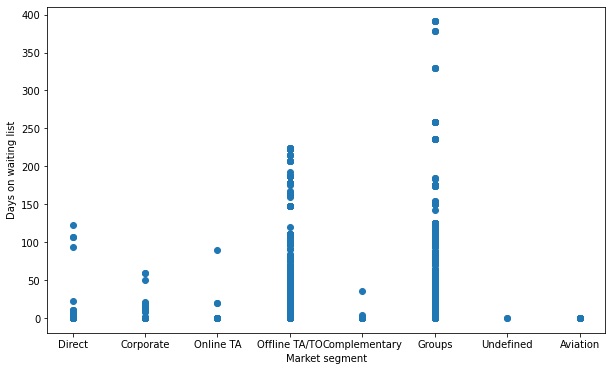

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). Thus when using fig, ax = plt.subplots
ax.scatter(data['market_segment'], data['days_in_waiting_list'])
ax.set_xlabel('Market segment')
ax.set_ylabel('Days on waiting list')
plt.show()

Here, we see that Aviation industry have the minimum number of days on the waiting list. The reason for this might be that when a flight has to be land at the location, it has to provide immediate accomodation to all of its working staff like Pilots, Air hostages etc. so they do not entertain hotels which put them on a waiting list for too long. So, in general, the hotel management sees that there needs are met immediately and provide rooms to them with almost 0 days on the waiting list.